<a href="https://colab.research.google.com/github/labibaa/Forecasting-Inflation/blob/main/SVR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

SVM

In [ ]:
import pandas as pd
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving datasetf_1 - cpi_month.csv to datasetf_1 - cpi_month.csv


In [ ]:
data = pd.read_csv('datasetf_1 - cpi_month.csv')

In [ ]:
data.head()

,Date,CPI,Inflation
0,01/01/2013,184.33,6.62
1,01/02/2013,184.79,7.84
2,01/03/2013,185.01,7.71
3,01/04/2013,185.13,8.37
4,01/05/2013,182.91,7.98


In [ ]:
data['Date'] = pd.to_datetime(data['Date'], format='%d/%m/%Y')


In [ ]:
data.tail()

,Date,CPI,Inflation
113,2022-06-01,313.76,7.56
114,2022-07-01,315.13,7.48
115,2022-08-01,326.06,9.52
116,2022-09-01,331.88,9.10
117,2022-10-01,334.89,8.91


In [ ]:
train_data = data[data['Date'] < '2019-11-01']
test_data = data[data['Date'] >= '2019-11-01']

In [ ]:
test_data

,Date,CPI,Inflation
82,2019-11-01,273.60,6.05
83,2019-12-01,272.97,5.75
84,2020-01-01,276.16,5.57
85,2020-02-01,275.63,5.46
86,2020-03-01,276.83,5.48
87,2020-04-01,278.39,5.96
88,2020-05-01,273.53,5.35
89,2020-06-01,276.12,6.02
90,2020-07-01,278.27,5.53
91,2020-08-01,282.11,5.68


In [ ]:
if train_data.empty:
    raise ValueError("Training data is empty. Please check the splitting logic.")

In [ ]:
X_train = train_data[['CPI']]
y_train = train_data['Inflation']
X_test = test_data[['CPI']]
y_test = test_data['Inflation']

In [ ]:
svm = SVR()


In [ ]:
svm.fit(X_train, y_train)


SVR()

In [ ]:
y_pred = svm.predict(X_test)


In [ ]:
from sklearn.metrics import mean_absolute_error
import numpy as np

In [ ]:
def calculate_mape(y_test, y_pred):
    return np.mean(np.abs((y_test - y_pred) / y_test)) * 100

mape = calculate_mape(y_test, y_pred)

rmse = mean_squared_error(y_test, y_pred, squared=False)

mae = mean_absolute_error(y_test, y_pred)

print('Mean Absolute Error (MAE):', mae)
print('Root Mean Squared Error (RMSE):', rmse)
print('Mean Absolute Percentage Error (MAPE):', mape)

Mean Absolute Error (MAE): 0.6460432359301791
Root Mean Squared Error (RMSE): 0.9767749634472445
Mean Absolute Percentage Error (MAPE): 9.505788546565674


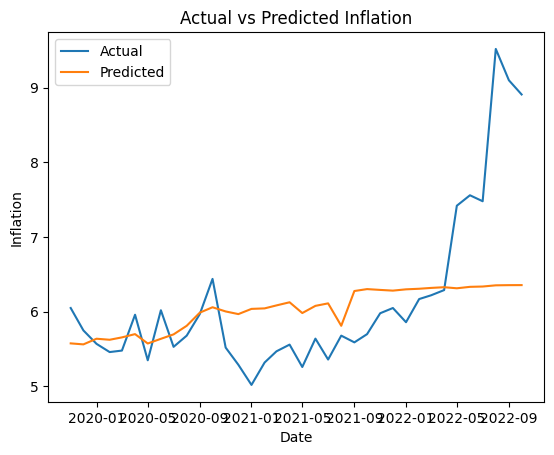

In [ ]:
plt.plot(test_data['Date'], y_test, label='Actual')
plt.plot(test_data['Date'], y_pred, label='Predicted')
plt.xlabel('Date')
plt.ylabel('Inflation')
plt.title('Actual vs Predicted Inflation')
plt.legend()
plt.show()

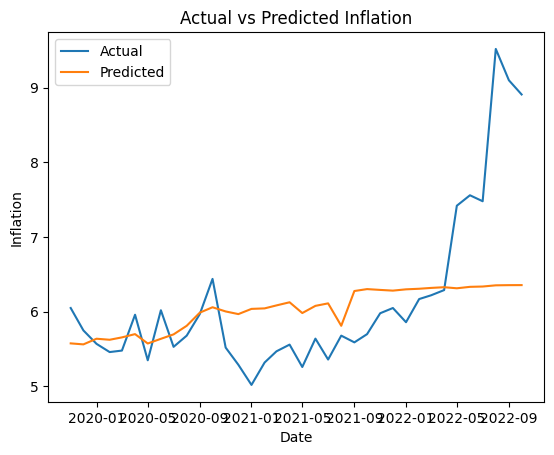

In [ ]:
plt.plot(test_data['Date'], y_test, label='Actual')
plt.plot(test_data['Date'], y_pred, label='Predicted')
plt.xlabel('Date')
plt.ylabel('Inflation')
plt.title('Actual vs Predicted Inflation')
plt.legend()
plt.show()


In [ ]:
test_data['Predicted_Inflation'] = y_pred
test_data.to_csv('predicted_inflation.csv', index=False)

<ipython-input-19-40c009b255ad>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Predicted_Inflation'] = y_pred


In [ ]:
print(test_data)

          Date     CPI  Inflation  Predicted_Inflation
82  2019-11-01  273.60       6.05             5.576377
83  2019-12-01  272.97       5.75             5.562911
84  2020-01-01  276.16       5.57             5.638630
85  2020-02-01  275.63       5.46             5.624856
86  2020-03-01  276.83       5.48             5.656604
87  2020-04-01  278.39       5.96             5.700490
88  2020-05-01  273.53       5.35             5.574841
89  2020-06-01  276.12       6.02             5.637577
90  2020-07-01  278.27       5.53             5.697028
91  2020-08-01  282.11       5.68             5.811888
92  2020-09-01  288.12       5.97             5.988127
93  2020-10-01  290.91       6.44             6.060093
94  2020-11-01  288.71       5.52             6.004029
95  2020-12-01  287.41       5.29             5.968553
96  2021-01-01  290.03       5.02             6.038307
97  2021-02-01  290.30       5.32             6.045085
98  2021-03-01  291.96       5.47             6.084907
99  2021-0

In [ ]:
from google.colab import files
test_data.to_csv('test_data.csv', encoding = 'utf-8-sig')
files.download('test_data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>